# Función signo

En este ejemplo analizaremos la serie de Fourier de la función signo, restringuida al intervalo $[-\pi,\pi]$, definida por
$$
f(\theta):=\left\{
\begin{matrix}
-1,& \theta \in [-\pi,0]\\
1,& \theta \in [0,\pi]\\
\end{matrix}\right. ,
$$
cuya serie de Fourier es de la forma:
$$
f(\theta)=\sum_{n\rm{\ impar}}\frac{4}{n\pi}\sin(n\theta)=\sum_{k=0}^{\infty}\frac{4}{\pi}\frac{\sin[(2k+1)\theta]}{(2k+1)}.
$$

Definimos el $k$-ésimo término de la serie como 
$$
T_{k}(\theta):=\frac{4}{\pi}\frac{\sin[(2k+1)\theta]}{(2k+1)},
$$
y la serie de Fourier truncada hasta el término $n$-ésimo, es decir, 
$$
S_n(\theta):=\sum_{k=0}^n T_{k}(\theta).
$$

# Con Numpy

Primero graficaremos la función y la serie truncada usando Numpy. Para ello, cargamos los módulos correspondientes y definiremos una función que calcule la suma truncada:

In [1]:
from numpy import *
from matplotlib.pyplot import *
%matplotlib inline

In [2]:
def Sn(n,x):
    Sn=0
    for k in range(n+1):
        Sn += (4/pi)*sin((2*k+1)*x)/(2*k+1.)
    return Sn

Para graficar las curvas en el intervalo $[-2\pi,2\pi]$, creamos el arreglo de valores correspondiente:

In [3]:
x=linspace(-2*pi,2*pi,1000)

Con esto podemos graficar la serie truncada hasta un orden dado, por ejemplo, $n=10$:

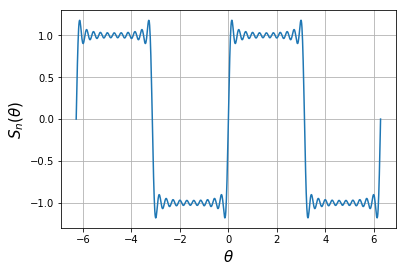

In [4]:
plot(x,Sn(10,x))
grid()
xlabel(r'$\theta$',fontsize=15)
ylabel(r'$S_n(\theta)$',fontsize=15)

Ahora graficamos varias series truncadas

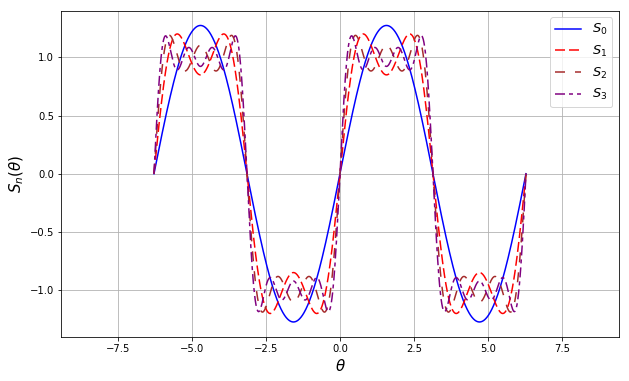

In [5]:
colores=['blue','red','brown','purple','black']
dasheses=[[],[5,2],[5,5],[5,2,2,2],[2,2]]

fig = figure(figsize=(10,6))
for n in range(4):
    plot(x,Sn(n,x),colores[n], dashes=dasheses[n],label='$S_{%d}$'%n, linewidth=1.5)
xlim(-3*pi,3*pi)
grid()
xlabel(r'$\theta$',fontsize=15)
ylabel(r'$S_n(\theta)$',fontsize=15)
legend(loc='best',fontsize=13)

También podemos explorar en forma interactiva cómo cambia la serie truncada al variar el número de términos, es decir, variando $n$. Para esto, definimos una función que crea el gráfico para un valor de $n$ dado:

In [6]:
def g(n=0):
    plot(x,Sn(n,x))
    xlim(-pi,pi)
    grid()
    xlabel(r'$\theta$',fontsize=15)
    ylabel(r'$S_n(\theta)$',fontsize=15)

Ahora desplegamos el gráfico en forma interactiva usando la función `interact` de `ipywidgets`:

In [7]:
from ipywidgets import interact

<function __main__.g>

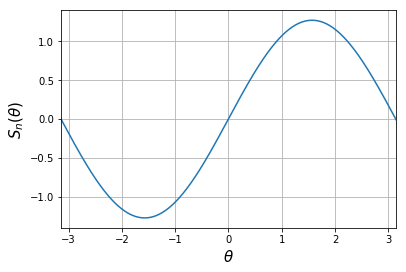

In [8]:
interact(g,n=(0,50))

# Con Sympy

Podemos además analizar este ejemplo usando el paquete de matemática simbólica `Sympy`

In [9]:
from sympy import *
init_printing()

Primero definimos algunos símbolos que usaremos

In [10]:
x = symbols('x', real=True)
n, m = symbols('n, m', integer=True)

Una forma rápida de intruducir la función que estamos estudiando es usando la función `Heaviside` que está predefinida en `Sympy`

In [11]:
f1 = 2*(Heaviside(x)- Rational(1,2))

`Sympy` tiene su propia función `plot` que permite graficar rápidamente una función definida en forma simbólica:

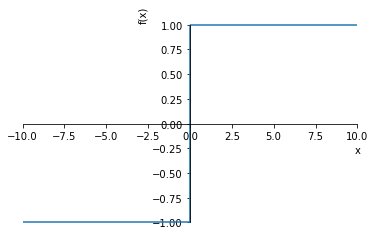

In [12]:
plot(f1)

La serie de Fourier puede ser calculada usando la función `fourier_series`:

In [13]:
sf = fourier_series(f1,(x,-pi,pi))
sf

Podemos calcular la serie truncada hasta un orden cualquiera con el método `truncate`

In [14]:
sf.truncate(n=15)

Y graficar en forma interactiva la serie truncada usando la función `plot` de `Sympy`

In [15]:
def g2(m=0):
    plot(sf.truncate(n=m), (x,-2*pi,2*pi))

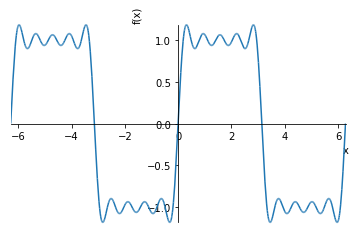

In [16]:
interact(g2,m=(1,50))

Finalmente, podemos calcular los coeficientes $b_n$ a partir de su definición

In [17]:
bn = (1/pi)*integrate(f1*sin(n*x),(x,-pi,pi))
bn

                          ⎛⎧   0     for n = 0⎞
    ⎛⎧ 0   for n = 0⎞     ⎜⎪                  ⎟
    ⎜⎪              ⎟     ⎜⎪     n            ⎟
- 2⋅⎜⎨-1            ⎟ + 2⋅⎜⎨-(-1)             ⎟
    ⎜⎪───  otherwise⎟     ⎜⎪───────  otherwise⎟
    ⎝⎩ n            ⎠     ⎜⎪   n              ⎟
                          ⎝⎩                  ⎠
───────────────────────────────────────────────
                       π                       

In [18]:
simplify(bn)

⎧       0         for n = 0
⎪                          
⎪  ⎛      n    ⎞           
⎨2⋅⎝- (-1)  + 1⎠           
⎪───────────────  otherwise
⎪      π⋅n                 
⎩                          

In [19]:
Sm = Sum(bn*sin(n*x),(n,0,oo))
Sm

   ∞                                        
_______                                     
╲                                           
 ╲      ⎧           0              for n = 0
  ╲     ⎪                                   
   ╲    ⎪⎛        n    ⎞                    
    ╲   ⎪⎜  2⋅(-1)    2⎟                    
     ╲  ⎨⎜- ─────── + ─⎟⋅sin(n⋅x)           
     ╱  ⎪⎝     n      n⎠                    
    ╱   ⎪────────────────────────  otherwise
   ╱    ⎪           π                       
  ╱     ⎩                                   
 ╱                                          
╱                                           
‾‾‾‾‾‾‾                                     
 n = 0                                      

In [20]:
def g3(m=0):
    plot(Sum(bn*sin(n*x),(n,0,m)).doit(), (x,-2*pi,2*pi))
# Sum().doit() es equivalente a summation()

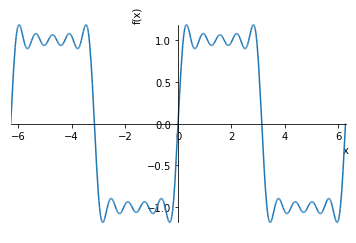

In [21]:
interact(g3,m=(1,50))